# 01 · Análisis Exploratorio de Datos (EDA)

Objetivo: comprender la estructura del dataset, calidad de datos y patrones iniciales relevantes para pricing y segmentación.

In [5]:
# Importaciones básicas
import os, pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

# Módulos del proyecto
import sys

# Resolver raíz del proyecto de forma robusta
ROOT = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

from src.data_processing import load_data, basic_clean
from src.visualization import plot_price_sensitivity

# Carga de datos crudos con ruta absoluta al proyecto
RAW_PATH = ROOT / 'data' / 'raw' / 'movie_theatre_sales.csv'
try:
    _df_raw = load_data(str(RAW_PATH))
    print('Registros crudos:', len(_df_raw), '| Ruta:', RAW_PATH)
except Exception as e:
    print('AVISO:', e, '| Ruta probada:', RAW_PATH)
    _df_raw = pd.DataFrame()

# Verificación rápida de contexto de ejecución
print('cwd:', os.getcwd())
print('ROOT:', ROOT)
print('CSV existe?', RAW_PATH.exists(), '->', RAW_PATH)

_df_raw.head() if not _df_raw.empty else _df_raw

Registros crudos: 1440 | Ruta: c:\Users\Carlos\OneDrive\Desktop\Proyecto Cine\cinema-subscription-optimization\data\raw\movie_theatre_sales.csv
cwd: c:\Users\Carlos\OneDrive\Desktop\Proyecto Cine\cinema-subscription-optimization\notebooks
ROOT: c:\Users\Carlos\OneDrive\Desktop\Proyecto Cine\cinema-subscription-optimization
CSV existe? True -> c:\Users\Carlos\OneDrive\Desktop\Proyecto Cine\cinema-subscription-optimization\data\raw\movie_theatre_sales.csv


,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
0,N4369,55,12.27,Comedy,Standard,7,No
1,B8091,35,19.02,Drama,Standard,Alone,Yes
2,V6341,55,22.52,Horror,VIP,3,No
3,B3243,53,23.01,Drama,Standard,6,Yes
4,I3814,30,21.81,Comedy,VIP,4,Yes


,Ticket_ID,Age,Ticket_Price,Movie_Genre,Seat_Type,Number_of_Person,Purchase_Again
count,745,745.000000,745.000000,745,745,745.000000,745.000000
unique,745,NaN,NaN,5,3,NaN,NaN
top,N4369,NaN,NaN,Comedy,Vip,NaN,NaN
freq,1,NaN,NaN,155,259,NaN,NaN
mean,NaN,38.985235,17.310255,NaN,NaN,4.637584,0.479195
std,NaN,12.288908,4.374432,NaN,NaN,1.703944,0.499903
min,NaN,18.000000,10.010000,NaN,NaN,2.000000,0.000000
25%,NaN,28.000000,13.620000,NaN,NaN,3.000000,0.000000
50%,NaN,40.000000,17.000000,NaN,NaN,5.000000,0.000000
75%,NaN,49.000000,21.310000,NaN,NaN,6.000000,1.000000


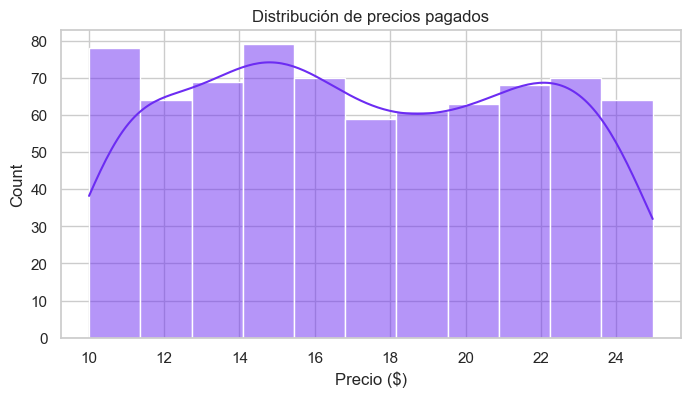

In [6]:
# Limpieza mínima para EDA
if not _df_raw.empty:
    df = basic_clean(_df_raw)
    from IPython.display import display
    display(df.describe(include='all'))
    fig = plot_price_sensitivity(df, 'Ticket_Price')
    # Mostrar la figura de forma compatible con backends no interactivos
    display(fig)
    plt.close(fig)
else:
    print('Sin datos para EDA. Coloca el CSV en data/raw/movie_theatre_sales.csv')